## Fraud Detection Using Self Organization Map

#### Part 1: Data Preprocessing

In [1]:
# import the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# import the dataset
dataset = pd.read_csv('dataset\Credit_Card_applications.csv')
X = dataset.iloc [: ,:-1].values    # independent variables
y = dataset.iloc [: , -1].values    # dependent variables

In [3]:
# feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

#### Part 2: Building The SOM Model

In [4]:
# import the SOM model
from minisom import MiniSom

In [5]:
# init the model
som = MiniSom( x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)

In [6]:
# init the weight
som.random_weights_init(X)

In [7]:
# traing the model
som.train_random(data = X, num_iteration = 100)

#### Part 3: Visualizing the result

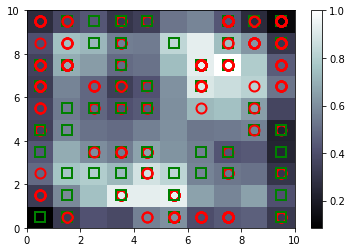

In [8]:
# making a self organization map
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o' , 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

#### Part 4: Cathch the Potential Fraud

In [11]:
# mapping the winning node
mappings = som.win_map(X)

In [13]:
#catch the cheater
frauds = np.concatenate((mappings[(7,8)], mappings[(3,1)], mappings[(5,1)] ) , axis=0)

In [14]:
# rescale the value using inverse function
frauds = sc.inverse_transform(frauds)

In [15]:
frauds

array([[1.5571415e+07, 1.0000000e+00, 3.7580000e+01, 0.0000000e+00,
        2.0000000e+00, 8.0000000e+00, 4.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        3.0000000e+00, 1.8400000e+02, 1.0000000e+00],
       [1.5699340e+07, 1.0000000e+00, 2.3170000e+01, 0.0000000e+00,
        2.0000000e+00, 8.0000000e+00, 4.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        3.0000000e+00, 1.8400000e+02, 1.0000000e+00],
       [1.5644400e+07, 1.0000000e+00, 3.4580000e+01, 0.0000000e+00,
        2.0000000e+00, 8.0000000e+00, 4.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        3.0000000e+00, 1.8400000e+02, 1.0000000e+00],
       [1.5684440e+07, 1.0000000e+00, 3.3670000e+01, 2.1650000e+00,
        2.0000000e+00, 8.0000000e+00, 4.0000000e+00, 1.5000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        3.0000000e+00,